<a href="https://colab.research.google.com/github/Canakin21/DL/blob/master/CNN_malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
himanshupoddar/zomato-bangalore-restaurants             Zomato Bangalore Restaurants                       88MB  2019-03-31 09:48:43           4616  
thegurus/spanish-high-speed-rail-system-ticket-pricing  Spanish High Speed Rail tickets pricing - Renfe    27MB  2019-05-10 06:50:30           1173  
crisparada/brazilian-cities                             Brazilian Cities                                  935KB  2019-05-24 20:49:21           1834  
chicago/chicago-copa-cases                              Chicago COPA Cases                                  3MB  2019-04-05 00:00:32           1785  
taniaj/australian-election-2019-tweets  

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!unzip \*.zip 

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cell-images-for-detecting-malaria.zip
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import sys
import scipy
import tensorflow as tf
import random

env: KERAS_BACKEND=tensorflow


In [0]:
from tqdm import tqdm
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Dense, Conv2D,MaxPool2D, MaxPooling2D,Dropout,BatchNormalization,Flatten
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add
from keras import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [0]:
Directory= r"cell_images"
Categories=["Parasitized","Uninfected"]

In [0]:
path_p=os.path.join(Directory, "Parasitized")
list_of_img_name_p=os.listdir(path_p)
path_u=os.path.join(Directory, "Uninfected")
list_of_img_name_u=os.listdir(path_u)
path_p=os.path.join(Directory, "Parasitized")
list_of_img_name_p=os.listdir(path_p)
path_u=os.path.join(Directory, "Uninfected")
list_of_img_name_u=os.listdir(path_u)
print(len(list_of_img_name_p))
print(len(list_of_img_name_u))

13780
13780


In [0]:
img_array=[]
img_size=100 
size=len(list_of_img_name_u)
for ic in range(size):
  try:
    img=image.load_img(path_p+"/"+list_of_img_name_p[ic],target_size=(img_size,img_size))
    temp=image.img_to_array(img)
    img_array.append(temp)
  except:
    print(list_of_img_name_p[ic]+" can't be added") 


for ic in range(size):
  try:
    img =image.load_img(path_u+"/"+list_of_img_name_u[ic],target_size=(img_size,img_size))
    temp=image.img_to_array(img)
    img_array.append(temp)
  except:
    print(list_of_img_name_u[ic]+" can't be added")

img_array = np.array(img_array)

Thumbs.db can't be added
Thumbs.db can't be added


In [0]:
size=int(np.shape(img_array)[0])
print(np.shape(img_array))
Y=np.hstack((np.ones(int(np.shape(img_array)[0]/2)),np.zeros(int(np.shape(img_array)[0]/2))))
print(Y.shape)
x_train, x_test, y_train, y_test = train_test_split(img_array, Y, test_size=0.2, random_state = 66)

(27558, 100, 100, 3)
(27558,)


In [0]:
x_train = x_train/255
x_test = x_test/255
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [0]:
filter_size=8
filter_num=4

model = Sequential()

model.add(Conv2D(filter_num, (filter_size, filter_size), padding='same', input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filter_num*2, (filter_size, filter_size), padding='same', input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filter_num*4, (filter_size, filter_size), padding='same', input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filter_num*8, (filter_size, filter_size), padding='same', input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filter_num*16, (filter_size, filter_size), padding='same', input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())  
model.add(Dense(16))
model.add(Activation('relu'))


model.add(Dense(2))
model.add(Activation(tf.nn.softmax))


model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 100, 100, 4)       772       
_________________________________________________________________
activation_15 (Activation)   (None, 100, 100, 4)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 4)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 8)         2056      
_________________________________________________________________
activation_16 (Activation)   (None, 50, 50, 8)         0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 16)        8208      
__________

In [0]:
model.fit(x_train, y_train, batch_size=40, epochs=15)

W0623 18:18:52.323539 139783822792576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0623 18:18:52.389888 139783822792576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/15
22046/22046 [==============================] - 401s 18ms/step - loss: 0.2386 - acc: 0.5859
Epoch 2/15
22046/22046 [==============================] - 399s 18ms/step - loss: 0.0869 - acc: 0.8945
Epoch 3/15
22046/22046 [==============================] - 400s 18ms/step - loss: 0.0499 - acc: 0.9383
Epoch 4/15
22046/22046 [==============================] - 400s 18ms/step - loss: 0.0425 - acc: 0.9467
Epoch 5/15
22046/22046 [==============================] - 398s 18ms/step - loss: 0.0390 - acc: 0.9524
Epoch 6/15
22046/22046 [==============================] - 397s 18ms/step - loss: 0.0375 - acc: 0.9541
Epoch 7/15
22046/22046 [==============================] - 397s 18ms/step - loss: 0.0360 - acc: 0.9568
Epoch 8/15
22046/22046 [==============================] - 396s 18ms/step - loss: 0.0347 - acc: 0.9584
Epoch 9/15
22046/22046 [==============================] - 397s 18ms/step - loss: 0.0335 - acc: 0.9607
Epoch 10/15
22046/22046 [==============================] - 397s 18ms/step - loss: 

5512/5512 [==============================] - 28s 5ms/step
Loss: 0.040522
準確率: 95.119739


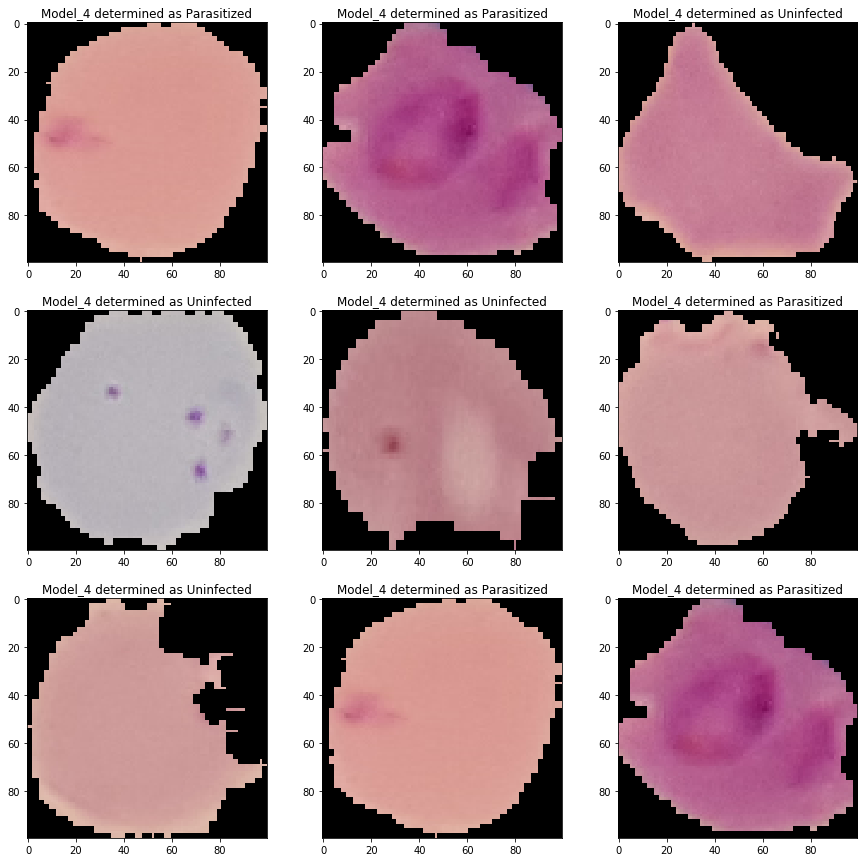

In [0]:
score = model.evaluate(x_test, y_test)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

predict = model.predict_classes(x_test)
w_4=[]
for ic in range(3200):
  if (predict_4[ic] == 1) & (y_test[ic][1]==0) :
     w_4.append(ic)
  if (predict_4[ic] == 0) & (y_test[ic][0]==0) :
     w_4.append(ic)
w_4
def test_4(ic):

    if predict[ic] == 1:
       return 'Model_4 determined as Parasitized'
    else:
       return 'Model_4 determined as Uninfected'

random_number=random.randrange(0,len(w_4))
fig, axs=plt.subplots(3,3,figsize=(15,15))
for ic in range(3):
  for icj in range(3):
    random.seed(random_number+2*icj-ic)
    axs[ic,icj].imshow(x_test[w_4[random.randrange(0,len(w_4))]]);
    axs[ic,icj].set_title(test_4(w_4[random.randrange(0,len(w_4))]));

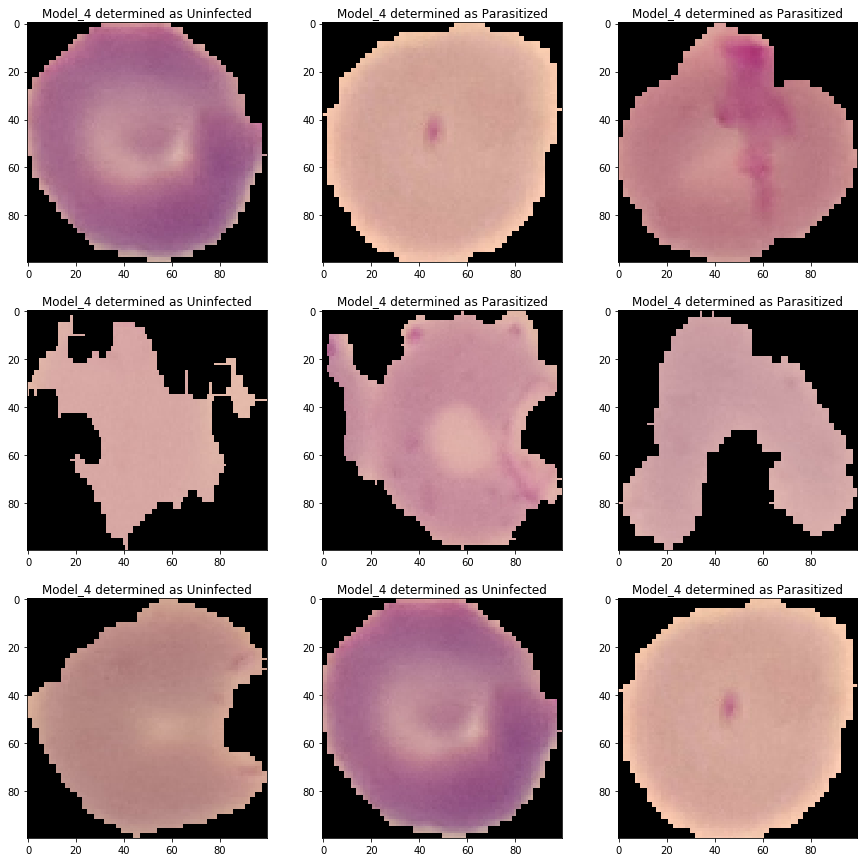

In [0]:
random_number=random.randrange(0,len(w_4))
fig, axs=plt.subplots(3,3,figsize=(15,15))
for ic in range(3):
  for icj in range(3):
    random.seed(random_number+2*icj-ic)
    axs[ic,icj].imshow(x_test[w_4[random.randrange(0,len(w_4))]]);
    axs[ic,icj].set_title(test_4(w_4[random.randrange(0,len(w_4))]));